In [ ]:
# pip install opencv-python

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
import os
import cv2
from sklearn.metrics import accuracy_score

In [11]:
train_dir = r'C:\\Users\\User\\Downloads\\dataset\\dogs_vs_cats\\train'
image_size = 100

### Import the images and create a data frame with the pixels of the images:

In [36]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':return [0]
    elif word_label == 'dog':return [1]

In [37]:
def create_train_data():
    training_data=[]
    for img in (os.listdir(train_dir)):
        label=label_img(img)
        path=os.path.join(train_dir,img)
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
        training_data.append([img,label])
    np.save('train_data.npy',training_data)
    return training_data

In [40]:
train_data = create_train_data()

In [ ]:
def create_pic_row(i):
    df2 = pd.DataFrame(train_data[i][0][0])
    for x in range (1,100):
        df3 = pd.DataFrame(train_data[i][0][x])
        df2 = df2.append(df3)
    df4 = pd.DataFrame(train_data[i][1])
    df2 = df2.append(df4)
    df2 = df2.T
    return df2

In [ ]:
df = create_pic_row(0)
for i in range(1,24999):
    count = i
    df1 = create_pic_row(i) 
    df = df.append(df1) 
#     print(i)
df

In [ ]:
# Saving the Data Frame to a file:
df.to_csv(r'C:\Users\User\Downloads\dataset\Dogs vs Cats.csv', index = False)

In [2]:
# Opening of the Data Frame:
df = pd.read_csv(r'C:\Users\User\Downloads\dataset\Dogs vs Cats.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


In [3]:
# Change the range of rows and columns:
rows = np.arange(0,24999)
columns = np.arange(0,10001)
df = df.set_axis(columns, axis='columns')
df = df.set_index(rows)

In [4]:
# Rename the column of the label:
df = df.rename(columns={10000: 'label'})
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


# Division of data:

In [63]:
from sklearn.model_selection import train_test_split
x = df.drop(labels = ['label'], axis=1)
y = df.label
X, X_Test, Y, Y_Test = train_test_split(x, y,random_state=2) # Division into the final test
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=2) # Division into validation
print (x_train.shape, x_test.shape, X_Test.shape)
print(y_train.shape, y_test.shape, Y_Test.shape)

(14061, 10000) (4688, 10000) (6250, 10000)
(14061,) (4688,) (6250,)


To decide how much pca will be relatively good, we will try to see what an image will look like when you reduce the pca to 36:

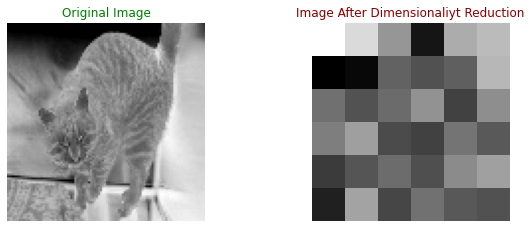

In [76]:
pca = PCA(n_components=36)
x_reduced = pca.fit_transform(x_train)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(x_train.to_numpy()[2246].reshape(100,100) , cmap="gist_yarg")
plt.title("Original Image" , color="green")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(x_reduced[2245].reshape(6,6) , cmap="gist_yarg")
plt.title("Image After Dimensionaliyt Reduction" , color="darkred")
plt.axis("off")
plt.show()

The picture is not clear enough, we will try to increase the pca to 144:

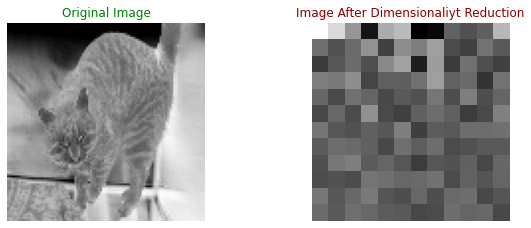

In [77]:
pca = PCA(n_components=144)
x_reduced = pca.fit_transform(x_train)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(x_train.to_numpy()[2246].reshape(100,100) , cmap="gist_yarg")
plt.title("Original Image" , color="green")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(x_reduced[2245].reshape(12,12) , cmap="gist_yarg")
plt.title("Image After Dimensionaliyt Reduction" , color="darkred")
plt.axis("off")
plt.show()

The picture is still not clear enough, but better than when the pca 36.
Therefore, pca is chosen which is close to 144:

# PCA (cumsum)

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.85) + 1
pca = PCA(n_components=0.85)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
print (X_train.shape, X_test.shape)

(14061, 138) (4688, 138)


# KNN:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)*100
print ("KNN accuracy: " + str(knn_accuracy) + "%")

KNN accuracy: 58.91638225255973%


# Decision Tree:

In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predict)*100
print ("Decision Tree accuracy: " + str(clf_accuracy) + "%")

Decision Tree accuracy: 54.62883959044369%


# Random Forest:

In [44]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=10)
ran.fit(X_train, y_train)
ran_predict = ran.predict(X_test)
ran_accuracy = accuracy_score(y_test, ran_predict)*100
print ("random forest accuracy: " + str(ran_accuracy) + "%")

random forest accuracy: 61.902730375426614%


# AdaBoost:

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_predict = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predict)*100
print ("AdaBoost accuracy: " + str(ada_accuracy) + "%")

AdaBoost accuracy: 60.49488054607508%


# XGBoost:

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict)*100
print ("XGBoost accuracy: " + str(xgb_accuracy) + "%")

XGBoost accuracy: 62.755972696245735%


# Stacking:

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
sta.fit(X_train, y_train)
sta_predict = sta.predict(X_test)
sta_accuracy = accuracy_score(y_test, sta_predict)*100
print ("Stacking accuracy: " + str(sta_accuracy) + "%")

Stacking accuracy: 58.31911262798635%


# Voting:

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vot.fit(X_train, y_train)
vot_predict = vot.predict(X_test)
vot_accuracy = accuracy_score(y_test, vot_predict)*100
print ("Voting accuracy: " + str(vot_accuracy) + "%")

Voting accuracy: 62.03071672354948%


# Pipeline:

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict = pip.predict(X_test)
pip_accuracy = accuracy_score(y_test, pip_predict)*100
print ("Pipeline accuracy: " + str(pip_accuracy) + "%")

Pipeline accuracy: 68.38737201365188%


# KMeans:

In [50]:
from sklearn.cluster import KMeans
kme = KMeans(n_clusters=10)
kme.fit(X_train, y_train)
kme_predict = kme.predict(X_test)
kme_accuracy = accuracy_score(y_test, kme_predict)*100
print ("KMeans accuracy: " + str(kme_accuracy) + "%")

KMeans accuracy: 9.74829351535836%


# Comparison between the models after PCA 138:

Text(0, 0.5, 'Accuracy (%)')

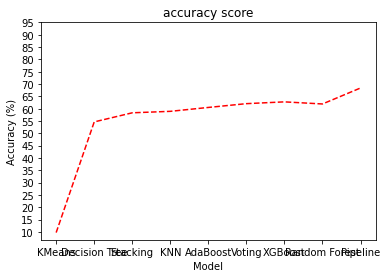

In [51]:
arrX = ['KMeans','Decision Tree', 'Stacking', 'KNN', 'AdaBoost', 'Voting', 'XGBoost', 'Random Forest', 'Pipeline']
arrY = [kme_accuracy, clf_accuracy, sta_accuracy, knn_accuracy, ada_accuracy, vot_accuracy, xgb_accuracy, ran_accuracy, pip_accuracy]
plt.plot (arrX, arrY, 'r--')
plt.title('accuracy score')
plt.yticks(np.arange(10,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

I will show the confusion metrix of the 4 models with the best accuracies after pca 139:

# confusion_matrix after PCA 139:

In [52]:
from sklearn import metrics
pip_confusion = metrics.confusion_matrix(y_test, pip_predict)
ran_confusion = metrics.confusion_matrix(y_test, ran_predict)
vot_confusion = metrics.confusion_matrix(y_test, vot_predict)
xgb_confusion = metrics.confusion_matrix(y_test, xgb_predict)

0=cat 1=dog


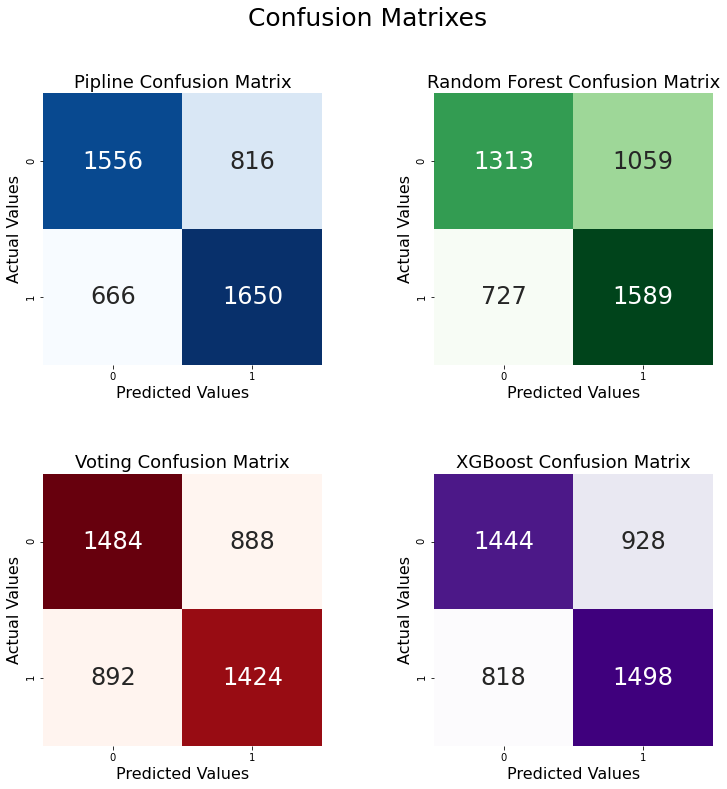

In [53]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Pipline Confusion Matrix",fontsize=18)
sns.heatmap(pip_confusion,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

print("0=cat", "1=dog")

plt.show()

#### I will check in a loop on the 5 models with the best accuracy the PCA in the range 30-40:
#### To check if it is worth lowering the amount of columns and there will be an accuracy that is good

## AdaBoost:

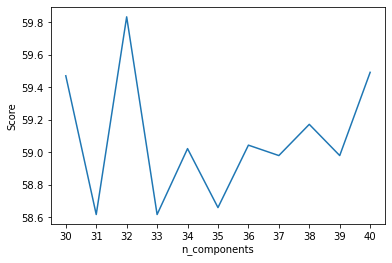

the maximum  AdaBoost score is: 59.83361774744027% while n_components=32


In [55]:
arr = []
# We will test in the 30-40 range what the best pca is:
for i in range(30,41):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada.fit(X_train, y_train)
    AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada_predict = ada.predict(X_test)
    arr.append(accuracy_score(y_test, ada_predict)*100)

# Graph showing accuracy:
plt.plot(range(30,41), arr)
plt.xticks(np.arange(30,41,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

ada_pca = max(arr)
print ("the maximum  AdaBoost score is: " + str(ada_pca) + "% while n_components=32")

## Voting:

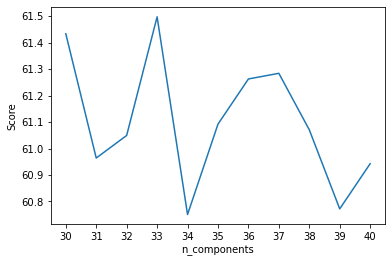

the maximum  Voting score is: 61.49744027303754% while n_components=33


In [56]:
arr = []
# We will test in the 30-40 range what the best pca is:
for i in range(30,41):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    clf1 = KNeighborsClassifier(n_neighbors=2)
    clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf3 = GaussianNB()
    vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
    vot.fit(X_train, y_train)
    vot_predict = vot.predict(X_test)
    arr.append(accuracy_score(y_test, vot_predict)*100)

# Graph showing accuracy:
plt.plot(range(30,41), arr)
plt.xticks(np.arange(30,41,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

vot_pca = max(arr)
print ("the maximum  Voting score is: " + str(vot_pca) + "% while n_components=33")

## XGBoost:

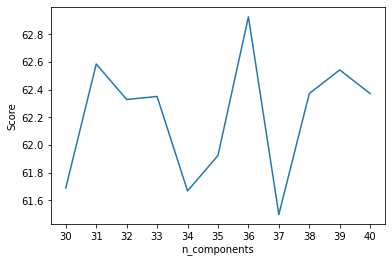

the maximum  XGBoost score is: 62.92662116040956% while n_components=33


In [57]:
arr = []
# We will test in the 30-40 range what the best pca is:
for i in range(30,41):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    xgb = XGBClassifier(eval_metric='mlogloss')
    xgb.fit(X_train, y_train)
    xgb_predict = xgb.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_predict)*100
    arr.append(accuracy_score(y_test, xgb_predict)*100)

# Graph showing accuracy:
plt.plot(range(30,41), arr)
plt.xticks(np.arange(30,41,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

xgb_pca = max(arr)
print ("the maximum  XGBoost score is: " + str(xgb_pca) + "% while n_components=33")

## Random Forest:

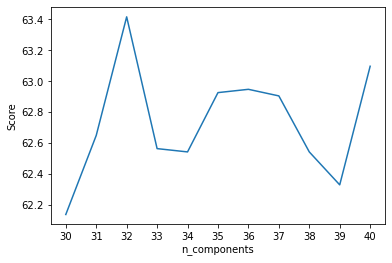

the maximum  Random Forest score is: 63.41723549488054% while n_components=36


In [58]:
arr = []
# We will test in the 30-40 range what the best pca is:
for i in range(30,41):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    ran = RandomForestClassifier(max_depth=10)
    ran.fit(X_train, y_train)
    ran_predict = ran.predict(X_test)
    arr.append(accuracy_score(y_test, ran_predict)*100)

# Graph showing accuracy:
plt.plot(range(30,41), arr)
plt.xticks(np.arange(30,41,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

ran_pca = max(arr)
print ("the maximum  Random Forest score is: " + str(ran_pca) + "% while n_components=36")

## Pipeline:

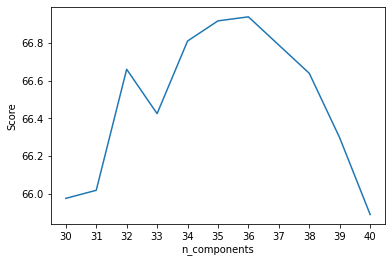

the maximum  Pipeline score is: 66.93686006825939% while n_components=37


In [59]:
arr = []
# We will test in the 30-40 range what the best pca is:
for i in range(30,41):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    pip.fit(X_train, y_train)
    pip_predict = pip.predict(X_test)
    arr.append(accuracy_score(y_test, pip_predict)*100)

# Graph showing accuracy:
plt.plot(range(30,41), arr)
plt.xticks(np.arange(30,41,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

pip_pca = max(arr)
print ("the maximum  Pipeline score is: " + str(pip_pca) + "% while n_components=37")

## Comparison between the models after PCA 139 and after lowest PCA:

Text(0, 0.5, 'Accuracy (%)')

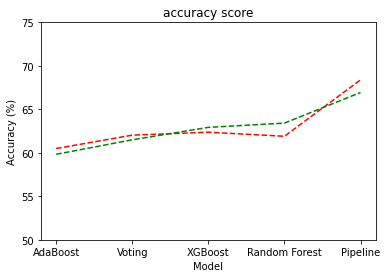

In [60]:
arrX = ['AdaBoost', 'Voting', 'XGBoost', 'Random Forest', 'Pipeline']
arrY = [ada_accuracy, vot_accuracy, xgb_accuracy, ran_accuracy, pip_accuracy]
arrY2 = [ada_pca, vot_pca, xgb_pca, ran_pca, pip_pca]
plt.plot (arrX, arrY, 'r--')
plt.plot (arrX, arrY2, 'g--')
plt.title('accuracy score')
plt.yticks(np.arange(50,80,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
# The red line shows the accuracy of the 5 best models after pca 139.
# The green line shows the accuracy after smaller pca.

It can be seen that in the model with the best accuracy there is a difference of about 1% between the model after pca 139 and after pca much lower.

I will show the confusion metrix of the 4 models with the best accuracies after lower pca:

# confusion_matrix after lower pca:

In [61]:
# Define vot_predict2 according to the pca that gives the best accuracy:
pca = PCA(n_components = 33)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
vot.fit(X_train, y_train)
vot_predict2 = vot.predict(X_test)

# Define xgb_predict2 according to the pca that gives the best accuracy:
xgb.fit(X_train, y_train)
xgb_predict2 = xgb.predict(X_test)

# Define ran_predict2 according to the pca that gives the best accuracy:
pca = PCA(n_components = 36)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
ran.fit(X_train, y_train)
ran_predict2 = ran.predict(X_test)

# Define pip_predict2 according to the pca that gives the best accuracy:
pca = PCA(n_components = 37)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
pip.fit(X_train, y_train)
pip_predict2 = pip.predict(X_test)

pip_confusion2 = metrics.confusion_matrix(y_test, pip_predict2)
ran_confusion2 = metrics.confusion_matrix(y_test, ran_predict2)
vot_confusion2 = metrics.confusion_matrix(y_test, vot_predict2)
xgb_confusion2 = metrics.confusion_matrix(y_test, xgb_predict2)

0=cat 1=dog


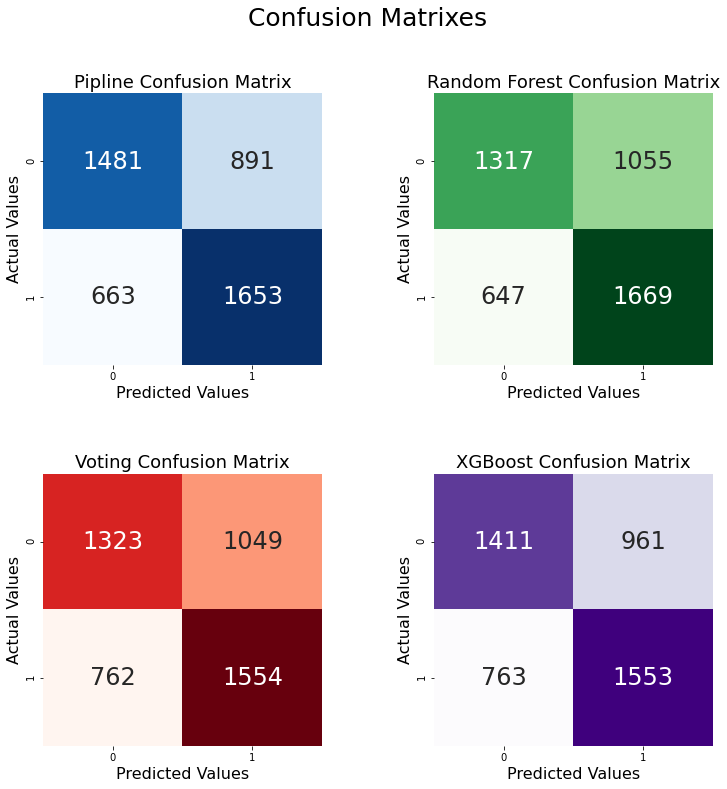

In [62]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Pipline Confusion Matrix",fontsize=18)
sns.heatmap(pip_confusion2,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion2,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion2,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion2,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

print("0=cat", "1=dog")

plt.show()

By comparison of all models, the best model is a pipline with pca 138.
### We will see how it works on the final test:

In [79]:
pca = PCA(n_components = 138)
X_Train2 = pca.fit_transform(x_train)
X_Test2 = pca.transform(X_Test)
explained_variance = pca.explained_variance_ratio_

pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_Train2, y_train)
pip_predict3 = pip.predict(X_Test2)
pip_accuracy3 = accuracy_score(Y_Test, pip_predict3)*100
print ("The best model: Pipeline accuracy: " + str(pip_accuracy3) + "%")

The best model: Pipeline accuracy: 67.136%


However, if we prefer efficiency over accuracy, we should lower the pca to 37 in the same model and get a precision that is about 2% lower.

In [80]:
pca = PCA(n_components = 37)
X_Train2 = pca.fit_transform(x_train)
X_Test2 = pca.transform(X_Test)
explained_variance = pca.explained_variance_ratio_

pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_Train2, y_train)
pip_predict3 = pip.predict(X_Test2)
pip_accuracy3 = accuracy_score(Y_Test, pip_predict3)*100
print ("The best model: Pipeline accuracy: " + str(pip_accuracy3) + "%")

The best model: Pipeline accuracy: 65.424%
